# Exercise 2.1

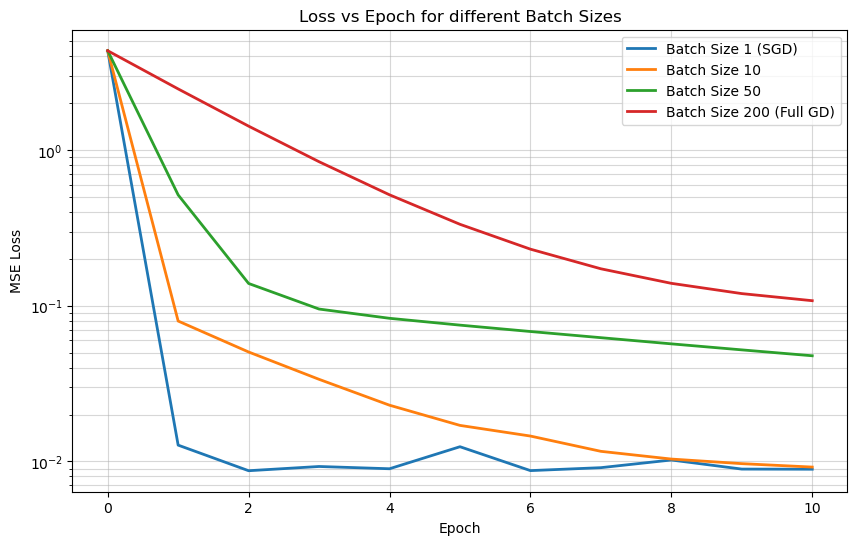

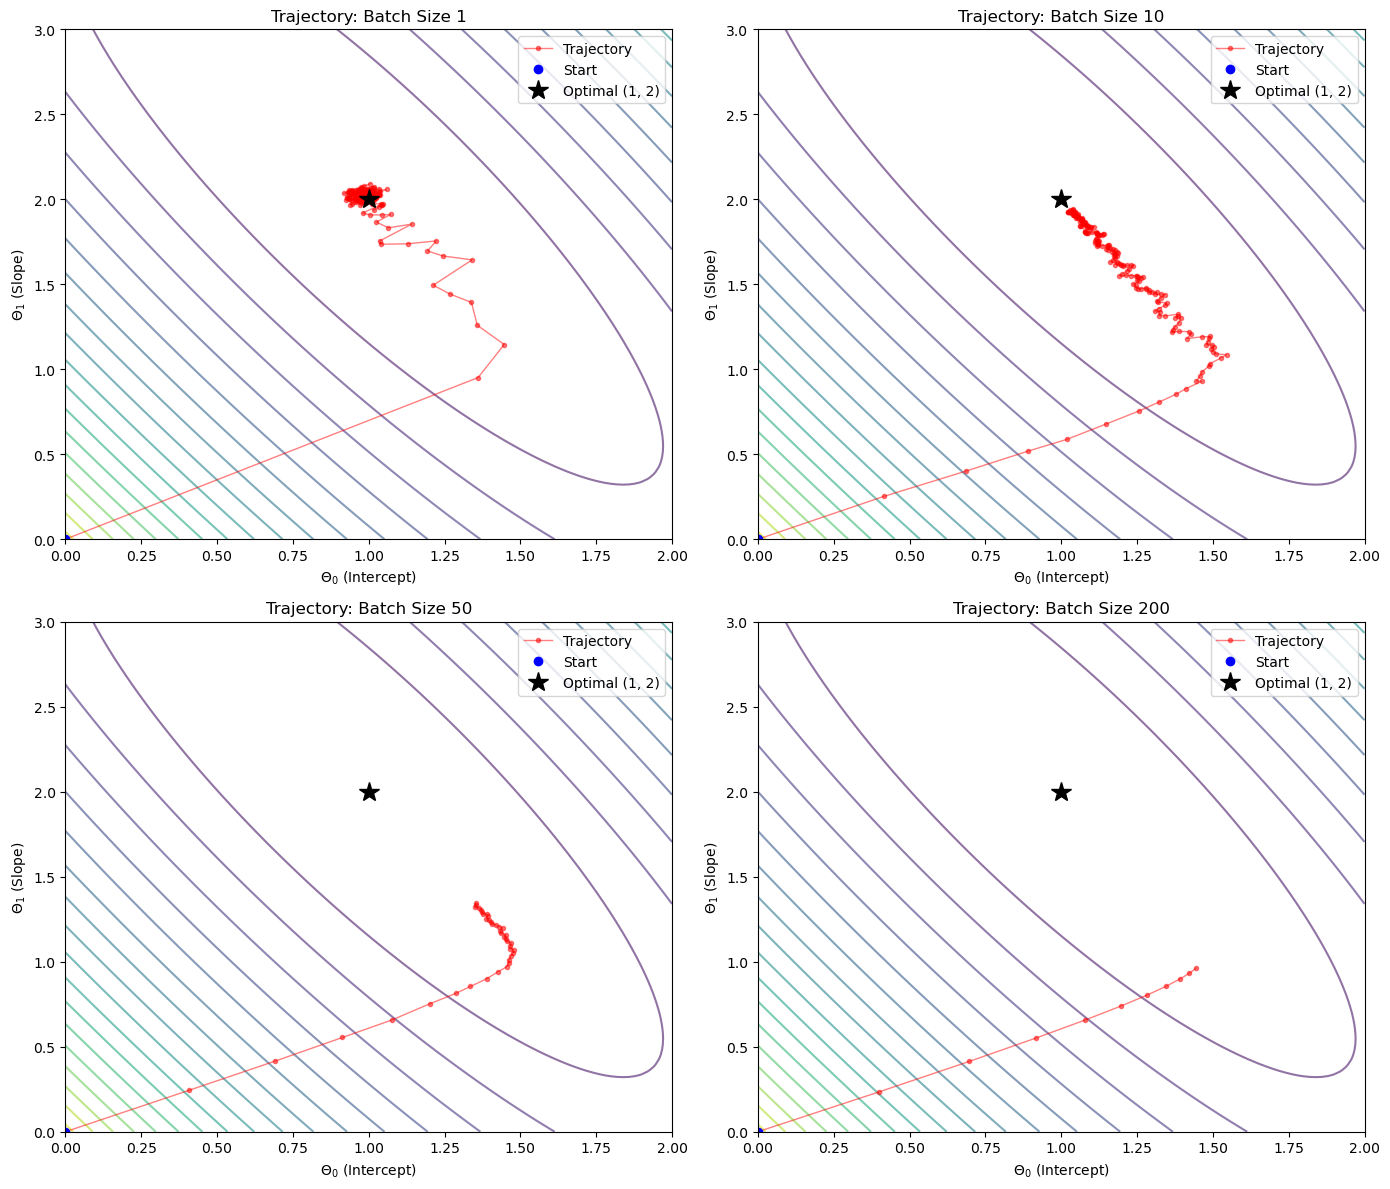

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 200
theta_true = np.array([1, 2]) 

i = np.arange(1, N + 1)
X = i / N
noise = np.random.normal(0, np.sqrt(0.01), N)
y = theta_true[0] + theta_true[1] * X + noise

X_b = np.c_[np.ones((N, 1)), X] 
y = y.reshape(-1, 1) 

def loss_fn(Theta, X, Y):
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def grad_fn(Theta, X, Y):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)

def SGD(l, grad_l, X, Y, Theta0, lr=0.1, batch_size=32, epochs=50):
    Theta = Theta0.copy()
    N = len(Y)
    theta_history = [Theta.copy()]
    loss_history = []
    loss_history.append(l(Theta, X, Y))

    for epoch in range(epochs):
        indices = np.random.permutation(N)
        for start in range(0, N, batch_size):
            batch_idx = indices[start:start+batch_size] 
            Xb, Yb = X[batch_idx], Y[batch_idx]       
            g = grad_l(Theta, Xb, Yb)
            Theta = Theta - lr * g
            
            theta_history.append(Theta.copy())
        
        loss_history.append(l(Theta, X, Y))
            
    return np.array(theta_history), np.array(loss_history)


common_start_theta = np.zeros((2, 1)) 
results = {}
batch_sizes = [1, 10, 50, 200]

for bs in batch_sizes:
    theta_hist, loss_hist = SGD(
        l=loss_fn,      
        grad_l=grad_fn,       
        X=X_b, 
        Y=y, 
        Theta0=common_start_theta,
        batch_size=bs,
        epochs=10,  
        lr=0.1      
    )
    results[bs] = {'loss': loss_hist, 'theta': theta_hist}

plt.figure(figsize=(10, 6))

for bs in batch_sizes:
    label = f'Batch Size {bs}'
    if bs == 1: label += ' (SGD)'
    if bs == 200: label += ' (Full GD)'
    
    plt.plot(results[bs]['loss'], label=label, linewidth=2)

plt.title('Loss vs Epoch for different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()
plt.show()

t0_vals = np.linspace(0, 2, 100)
t1_vals = np.linspace(0, 3, 100) 
T0, T1 = np.meshgrid(t0_vals, t1_vals)
Z = np.zeros_like(T0)

for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        t = np.array([[T0[i, j]], [T1[i, j]]])
        Z[i, j] = loss_fn(t, X_b, y)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, bs in enumerate(batch_sizes):
    ax = axes[idx]
    
    ax.contour(T0, T1, Z, levels=20, cmap='viridis', alpha=0.6)

    thetas = results[bs]['theta']
    step = 10 if bs == 1 else 1 
    
    ax.plot(thetas[::step, 0], thetas[::step, 1], 'r.-', alpha=0.5, label='Trajectory', linewidth=1)
    
    ax.plot(thetas[0, 0], thetas[0, 1], 'bo', label='Start')
    ax.plot(1, 2, 'k*', markersize=15, label='Optimal (1, 2)') 
    
    ax.set_title(f'Trajectory: Batch Size {bs}')
    ax.set_xlabel(r'$\Theta_0$ (Intercept)')
    ax.set_ylabel(r'$\Theta_1$ (Slope)')
    ax.legend()

plt.tight_layout()
plt.show()

# Exercise 2.2

Batch Size: 1 | Variance: 2.7079
Batch Size: 5 | Variance: 0.4376
Batch Size: 20 | Variance: 0.1159
Batch Size: 200 | Variance: 0.0000


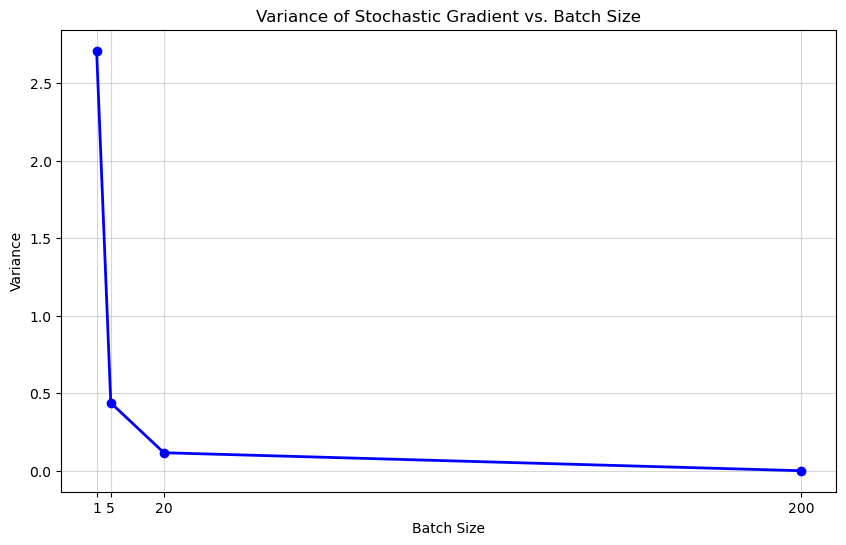

In [17]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# same generation as last exercise
N = 200
X = np.random.rand(N, 1)
theta_true = 3.0
noise = np.random.randn(N, 1) * 0.5
y = theta_true * X + noise

def loss_fn(Theta, X, Y):
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def grad_fn(Theta, X, Y):
    m = len(Y)
    return (2/m) * X.T @ (X @ Theta - Y)



Theta_fixed = np.array([[0.5]]) 
batch_sizes = [1, 5, 20, N]

variances = []
num_samples = 100
N_data = len(y)


for bs in batch_sizes:
    grads = []
    
    for _ in range(num_samples):
        idx = np.random.choice(N_data, bs, replace=False)
        X_b, y_b = X[idx], y[idx]
        
        g = grad_fn(Theta_fixed, X_b, y_b)
        grads.append(g)
    
    grads = np.array(grads) 
    
    var_g = np.var(grads, axis=0).sum()
    variances.append(var_g)
    
    print(f"Batch Size: {bs} | Variance: {var_g:.4f}")
    

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, variances, 'bo-', linewidth=2)
plt.title('Variance of Stochastic Gradient vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Variance')
plt.grid(True, alpha=0.5)
plt.xticks(batch_sizes)
plt.show()

# Exercise 2.3

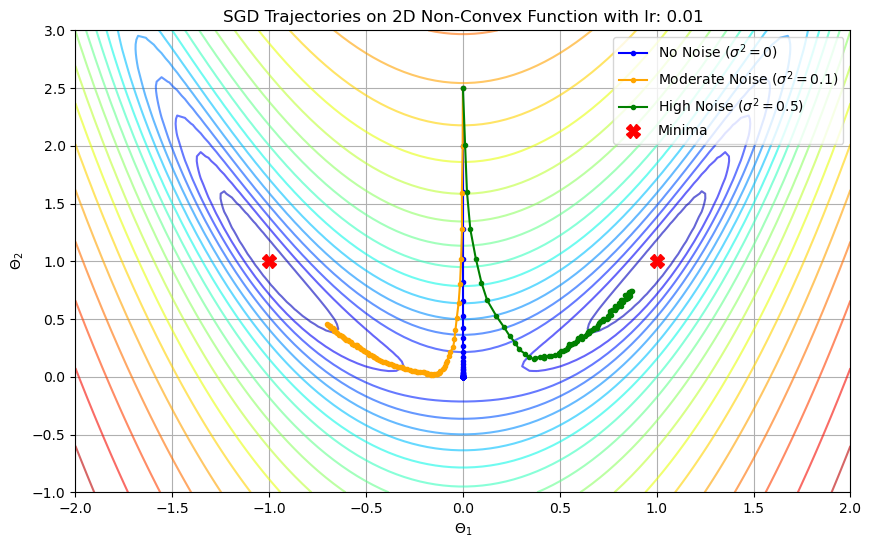

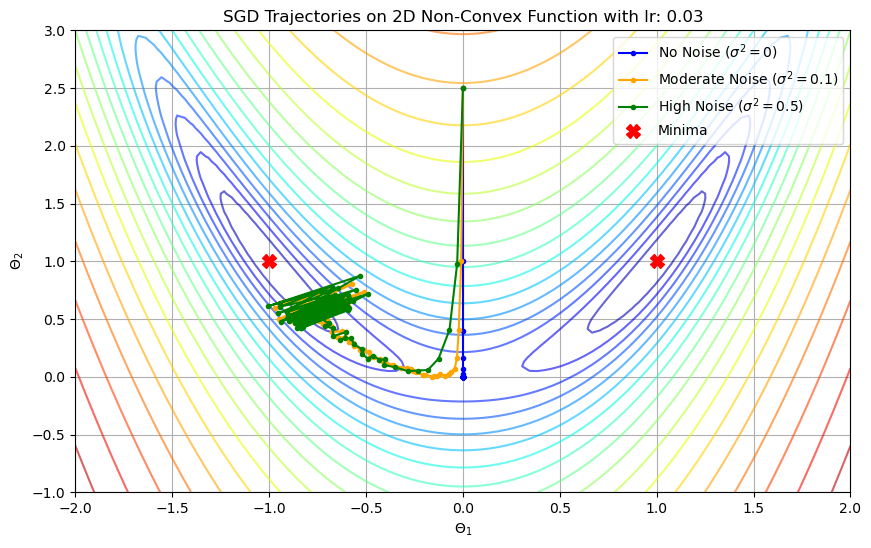

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
def loss_fn(theta):
    t1, t2 = theta[0], theta[1]
    return (t1**2 - 1)**2 + 10 * (t2 - t1**2)**2

def gradient_fn(theta):
    t1, t2 = theta[0], theta[1]
    grad_t1 = 4 * t1 * (t1**2 - 1) - 40 * t1 * (t2 - t1**2)
    grad_t2 = 20 * (t2 - t1**2)
    return np.array([grad_t1, grad_t2])

def run_sgd_2d(theta_start, lr, noise_variance, grad_f, iterations=100):
    path = [theta_start]
    theta = np.array(theta_start)
    
    for _ in range(iterations):
        grad = grad_f(theta)
        noise = np.random.normal(0, np.sqrt(noise_variance), size=2)
        g_k = grad + noise
        theta = theta - lr * g_k
        path.append(theta)
        
    return np.array(path)

learning_rates=[0.01, 0.03]
for learning_rate in learning_rates:
    t1_range = np.linspace(-2, 2, 100)
    t2_range = np.linspace(-1, 3, 100)
    T1, T2 = np.meshgrid(t1_range, t2_range)
    Z = (T1**2 - 1)**2 + 10 * (T2 - T1**2)**2
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.contour(T1, T2, np.log(Z + 1), levels=20, cmap='jet', alpha=0.6)
    start_pos = [0, 2.5]

    path_low_noise = run_sgd_2d(start_pos, grad_f=gradient_fn, lr=learning_rate, noise_variance=0)
    ax.plot(path_low_noise[:,0], path_low_noise[:,1], 'o-', color='blue', label='No Noise ($\sigma^2=0$)', markersize=3)

    path_medium_noise = run_sgd_2d(start_pos, grad_f=gradient_fn,lr=learning_rate, noise_variance=0.1)
    ax.plot(path_medium_noise[:,0], path_medium_noise[:,1], 'o-', color='orange', label='Moderate Noise ($\sigma^2=0.1$)', markersize=3)

    path_high_noise = run_sgd_2d(start_pos, grad_f=gradient_fn,lr=learning_rate, noise_variance=0.5)
    ax.plot(path_high_noise[:,0], path_high_noise[:,1], 'o-', color='green', label='High Noise ($\sigma^2=0.5$)', markersize=3)
    ax.plot([1, -1], [1, 1], 'rX', markersize=10, label='Minima')
    ax.set_title(f"SGD Trajectories on 2D Non-Convex Function with lr: {learning_rate}")
    ax.set_xlabel("$\Theta_1$")
    ax.set_ylabel("$\Theta_2$")
    ax.legend()
    plt.grid(True)
    plt.show()


# Exercise 2.4

Data Shape: X=(1338, 4), y=(1338, 1)

Final Parameters (Theta):
Full GD        : [0.001 0.273 0.168 0.057]
SGD (Batch=1)  : [-0.107  0.341  0.036  0.1  ]
SGD (Batch=10) : [0.009 0.281 0.161 0.084]
SGD (Batch=50) : [-0.     0.279  0.166  0.056]


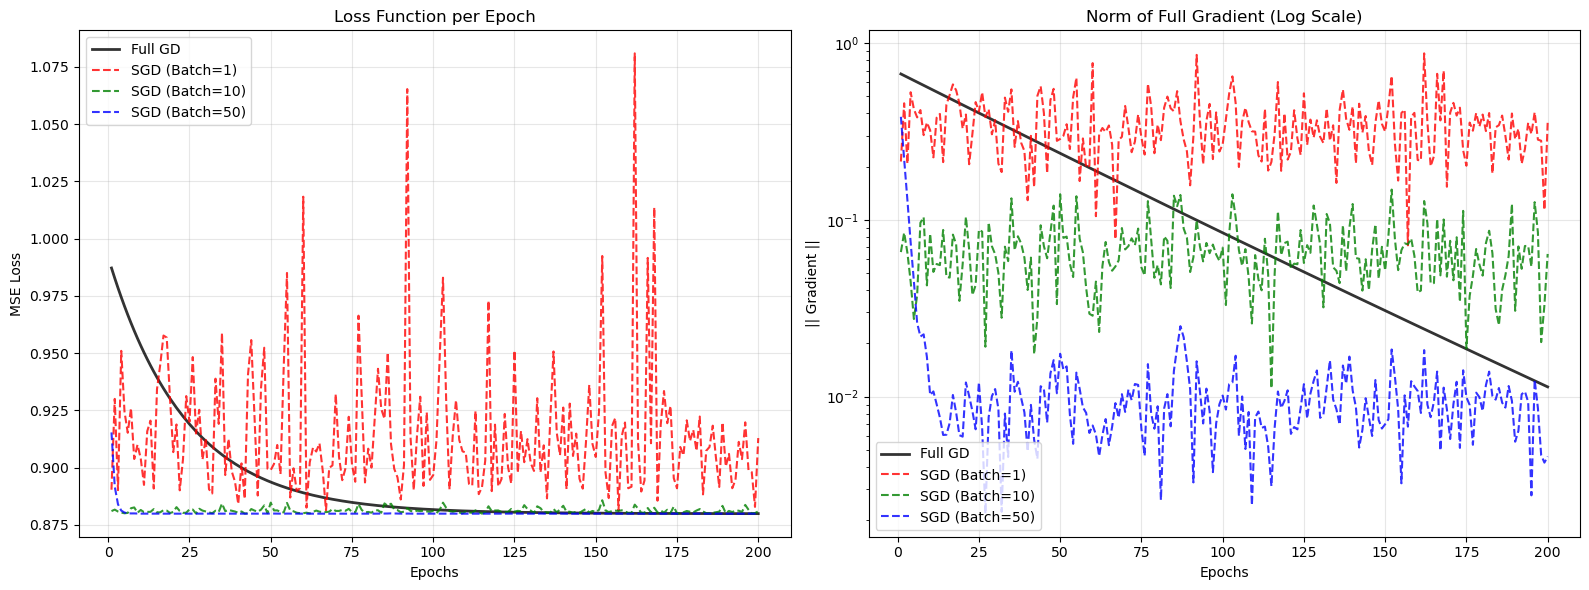

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/insurance.csv')
features = ['age', 'bmi', 'children']
target = 'charges'

X_raw = df[features].values
y_raw = df[target].values.reshape(-1, 1) 

X_mean = X_raw.mean(axis=0)
X_std = X_raw.std(axis=0)
X_scaled = (X_raw - X_mean) / X_std

y_mean = y_raw.mean()
y_std = y_raw.std()
y_scaled = (y_raw - y_mean) / y_std

N = X_scaled.shape[0]
X_final = np.c_[np.ones((N, 1)), X_scaled]

print(f"Data Shape: X={X_final.shape}, y={y_scaled.shape}")


def loss_fn(Theta, X, Y):
    residuals = X @ Theta - Y
    return (residuals**2).mean()

def grad_fn(Theta, X, Y):
    N = len(Y)
    return (2/N) * X.T @ (X @ Theta - Y)


def train_model(loss_f, grad_f, X, Y, batch_size, lr=0.01, epochs=50):
    N, D = X.shape
    
    np.random.seed(42) 
    Theta = np.random.randn(D, 1) * 0.1
    
    loss_history = []
    grad_norm_history = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        
        for i in range(0, N, batch_size):
            X_batch = X_shuffled[i : i+batch_size]
            Y_batch = Y_shuffled[i : i+batch_size]
            
            g = grad_f(Theta, X_batch, Y_batch)
            Theta = Theta - lr * g
            
        current_loss = loss_f(Theta, X, Y)
        full_grad = grad_f(Theta, X, Y)
        grad_norm = np.linalg.norm(full_grad)
        
        loss_history.append(current_loss)
        grad_norm_history.append(grad_norm)
        
    return Theta, loss_history, grad_norm_history

EPOCHS = 200
LR = 0.01 


configs = [
    ('Full GD', N),          
    ('SGD (Batch=1)', 1),    
    ('SGD (Batch=10)', 10),  
    ('SGD (Batch=50)', 50)   
]

results = {}

for name, bs in configs:
    theta, losses, norms = train_model(
        loss_f=loss_fn,
        grad_f=grad_fn,
        X=X_final,
        Y=y_scaled,
        batch_size=bs,
        lr=LR,
        epochs=EPOCHS
    )
    results[name] = {'loss': losses, 'norm': norms, 'theta': theta}


print("\nFinal Parameters (Theta):")
for name in results:
    t = results[name]['theta'].flatten()
    print(f"{name:<15}: {np.round(t, 3)}")

epochs_range = range(1, EPOCHS + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

styles = {
    'Full GD': ('k-', 2),
    'SGD (Batch=1)': ('r--', 1.5),
    'SGD (Batch=10)': ('g--', 1.5),
    'SGD (Batch=50)': ('b--', 1.5)
}

for name, data in results.items():
    c_style, width = styles[name]

    ax1.plot(epochs_range, data['loss'], c_style, linewidth=width, label=name, alpha=0.8)

    ax2.plot(epochs_range, data['norm'], c_style, linewidth=width, label=name, alpha=0.8)

ax1.set_title('Loss Function per Epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.set_yscale('log')
ax2.set_title('Norm of Full Gradient (Log Scale)')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('|| Gradient ||')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()